In [1]:
#10-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

print('\n'.join(breast_cancer['DESCR'].split('\n')[:15]))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter


In [2]:
#10-2
print(breast_cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
#10-3
df = pd.DataFrame(data = breast_cancer['data'], columns = breast_cancer['feature_names'])
df['target'] = breast_cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#10-4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
#10-5
print(f'標籤0為{breast_cancer["target_names"][0]}，是惡性腫瘤的意思')
print(df['target'].value_counts(normalize=True))

標籤0為malignant，是惡性腫瘤的意思
1    0.627417
0    0.372583
Name: target, dtype: float64


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


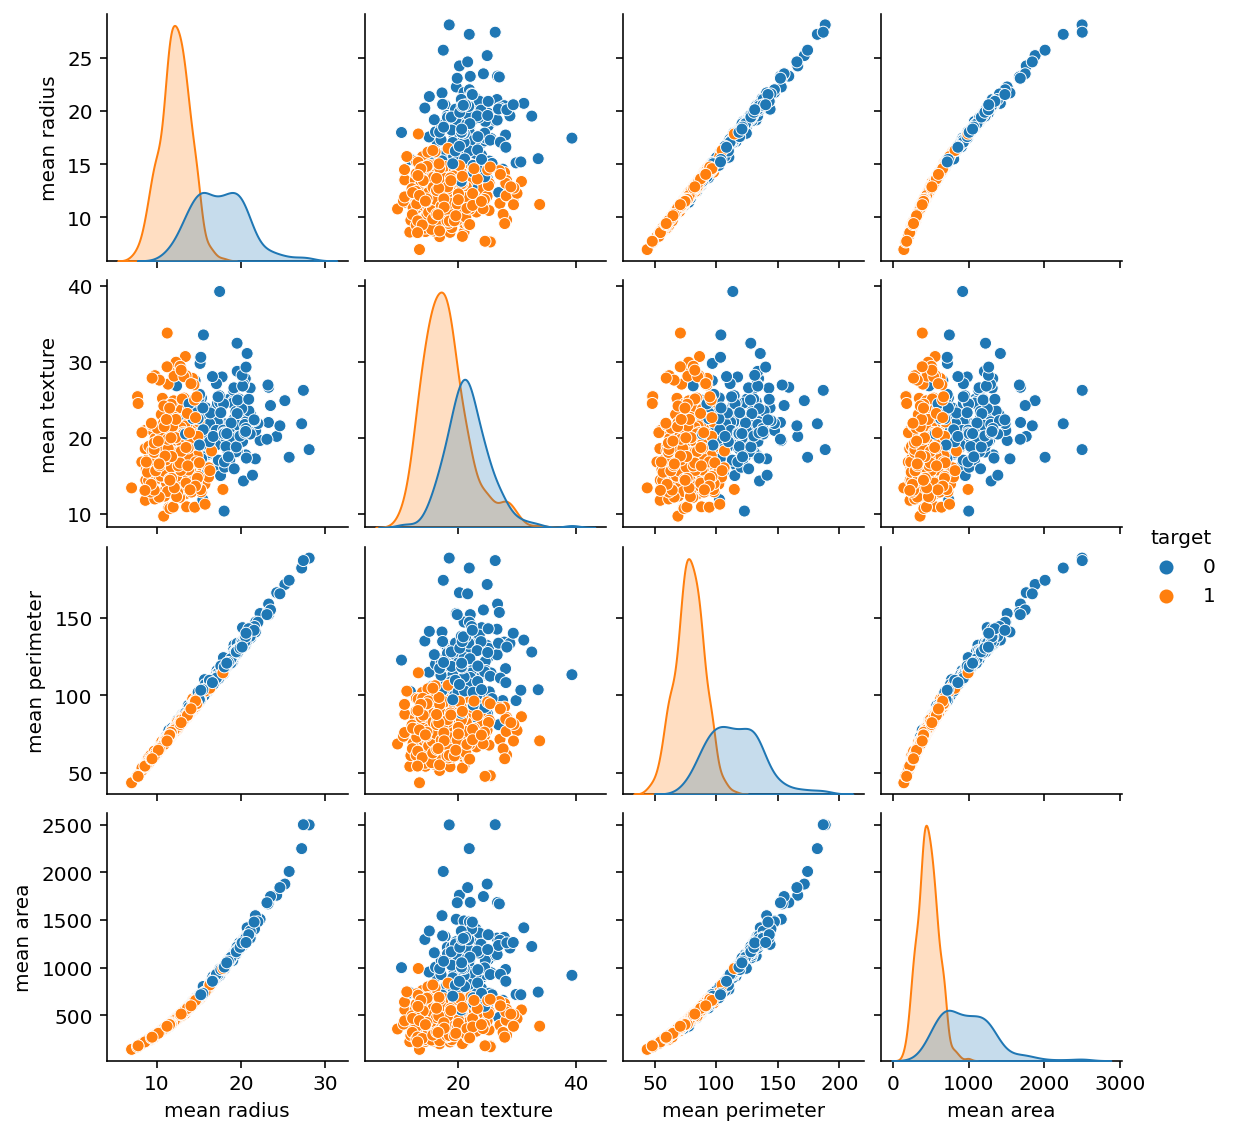

In [6]:
#10-6
sns.pairplot(df, vars=['mean radius','mean texture','mean perimeter','mean area'], hue='target', size=2);

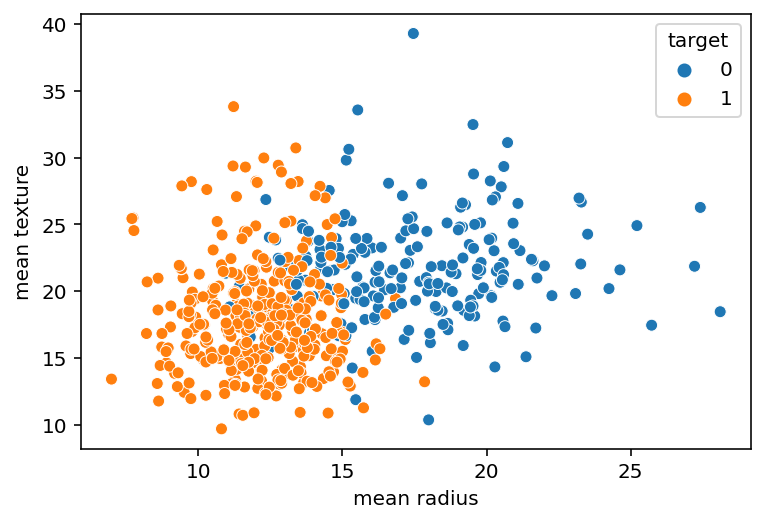

In [7]:
#10-7
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='target');

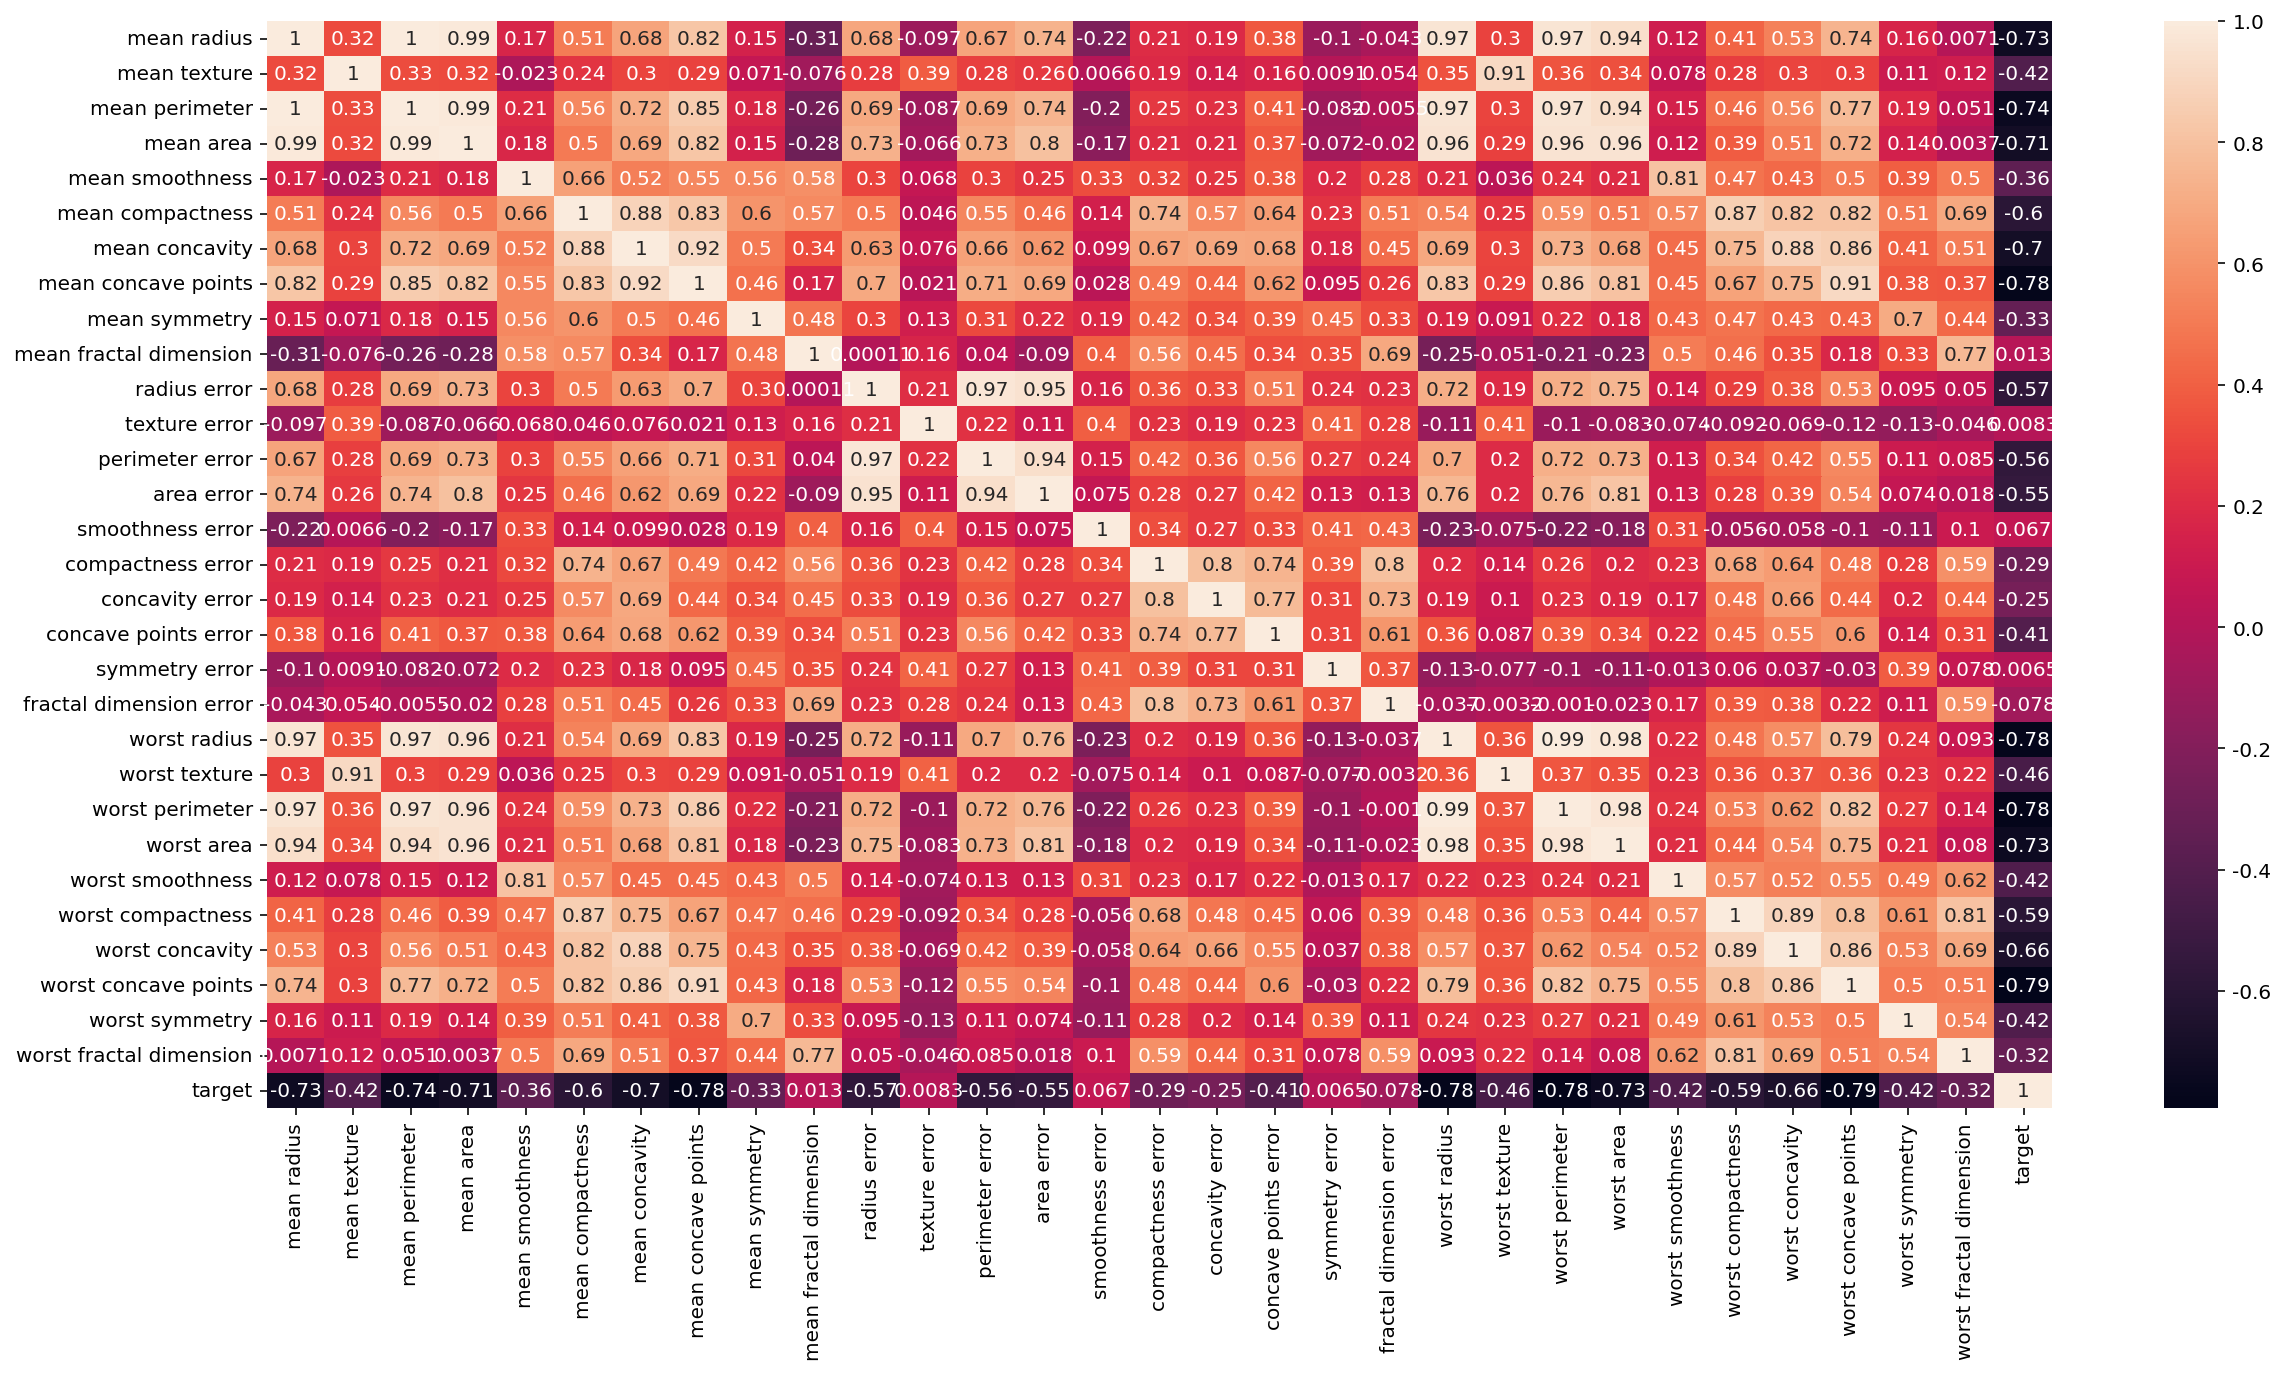

In [8]:
#10-8
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [9]:
#10-9
df.corr()['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [11]:
#10-10
X_cols = df.columns.drop('target')
X = df[X_cols]
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
#10-11
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = [LogisticRegression(), SVC(), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(max_depth=5)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    score = model_pl.score(X_test, y_test)
    scores[model.__class__.__name__] = score
scores

{'DecisionTreeClassifier': 0.9468085106382979,
 'KNeighborsClassifier': 0.9574468085106383,
 'LogisticRegression': 0.9787234042553191,
 'SVC': 0.9680851063829787}

In [13]:
#10-12
pd.Series(scores).sort_values(ascending=False)

LogisticRegression        0.978723
SVC                       0.968085
KNeighborsClassifier      0.957447
DecisionTreeClassifier    0.946809
dtype: float64

In [14]:
#10-13
from sklearn.model_selection import KFold
data = np.arange(10,18)
kfold = KFold(n_splits=4)
for train_idx, test_idx in kfold.split(data):
    print(f'訓練集資料: {data[train_idx]}， 測試集資料:{data[test_idx]}')

訓練集資料: [12 13 14 15 16 17]， 測試集資料:[10 11]
訓練集資料: [10 11 14 15 16 17]， 測試集資料:[12 13]
訓練集資料: [10 11 12 13 16 17]， 測試集資料:[14 15]
訓練集資料: [10 11 12 13 14 15]， 測試集資料:[16 17]


In [15]:
#10-14
kfold = KFold(n_splits=5)
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
scores = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    model_pl_lr.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    scores.append(model_pl_lr.score(X_train.iloc[test_idx], y_train.iloc[test_idx]))
print(f'5折交叉驗證的結果{np.mean(scores)}')

5折交叉驗證的結果0.97634996582365


In [16]:
#10-15
from sklearn.model_selection import cross_val_score
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='accuracy', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.98701299 0.97368421 1.         0.96052632 0.96052632]
5折交叉驗證的平均結果0.97634996582365


In [17]:
#10-16
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='recall', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [1.         1.         1.         1.         0.95744681]
5折交叉驗證的平均結果0.9914893617021276


In [18]:
#10-17
models = [LogisticRegression(), SVC(), 
          KNeighborsClassifier(), DecisionTreeClassifier(max_depth=10)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='accuracy', cv=10)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

LogisticRegression        0.976316
SVC                       0.971053
KNeighborsClassifier      0.965857
DecisionTreeClassifier    0.915857
dtype: float64

In [19]:
#10-18
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_pl_lr.fit(X_train, y_train)
y_pred = model_pl_lr.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(3))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.979
混亂矩陣
[[ 66   1]
 [  3 118]]
綜合報告
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [20]:
#10-19
model_tree = DecisionTreeClassifier(max_depth=10)
model_tree.fit(X_train, y_train)
pd.Series(model_tree.feature_importances_,
            index=X.columns).sort_values(ascending=False).head()

mean concave points    0.723194
worst perimeter        0.056358
mean texture           0.053138
worst concavity        0.040208
worst radius           0.036985
dtype: float64

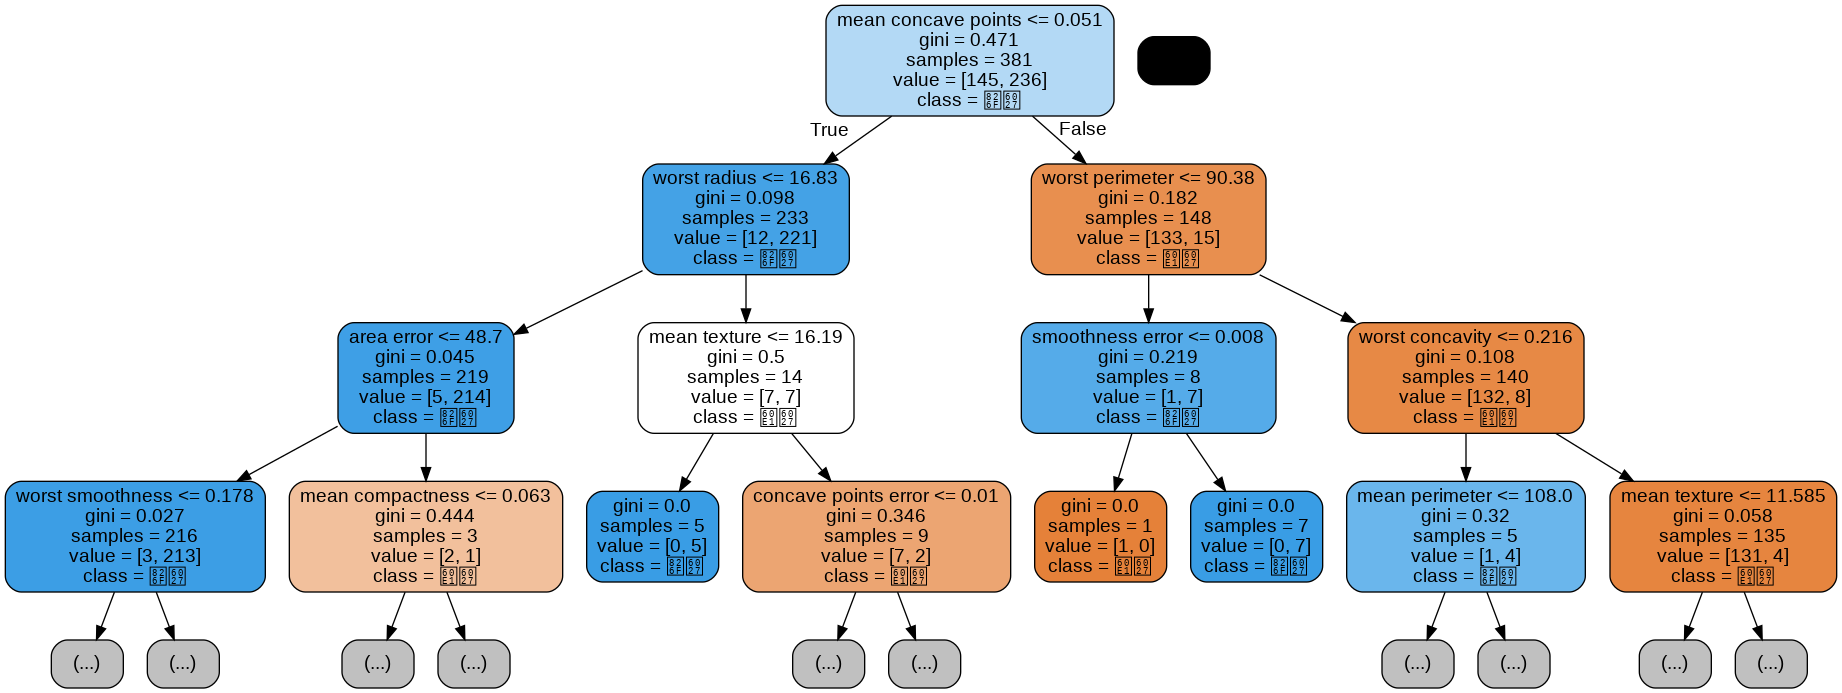

In [21]:
#10-20
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  

features = X.columns
class_names = ['惡性', '良性']
dot_data = export_graphviz(model_tree, out_file=None,
                           feature_names=features,
                           class_names = class_names,
                           proportion = False,
                           max_depth=3,
                           filled=True,
                           rounded=True)

graph = pydot.graph_from_dot_data(dot_data)  
graph[0].write_png('tumor.png')
Image(graph[0].create_png(), width=800)